In [1]:
import numpy as np
import astropy.units as u 
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
def chi_square_reduced(o,e):
    chi          = np.sum((o-e)**2/e)
    chi_reduced  = chi/len(o)
    return chi_reduced

In [4]:
"""boxAdata2.png"""

load_resistance = np.asarray([1.003e5,1.003e5,1.003e5,1.003e5,2e4,2e4,2e4,2e4,4.99e3,4.99e3,
                              9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,3.99e2,3.99e2,1e2,1e2,1e2]) #*u.ohm

CH1_voltage    = np.asarray([12.4,3.5,4.8,3.8,7.5,5.2,4,3.6,11.6,4.3,11.6,8.4,6.8,6,3.6,5.6,
                              3.6,8.8,6.6,6])                                                #*u.volt

CH1_frequency   = np.asarray([5.12e1,9.8e1,1.5e2,2.02e2,4.02e2,6.06e2,8.1e2,9.1e2,9.86e2,
                              2.98e3,5.025e3,7.042e3,9.05e3,1.042e4,2.02e4,2.93e4,5.07e4,
                             7.09e4,9e4,9.9e4])                                              #*u.hertz

CH2_voltage     = np.asarray([32,34,34,34,33,33,33,34,32.4,33.2,32.4,33.2,33.2,33.2,34.4,
                              34.2,34,33,30.8,30])                                           #*u.volt

CH2_frequency   = np.asarray([5.12e1,9.82e1,1.507e2,1.99e2,4.02e2,6.05e2,8.06e2,9.12e2,
                              9.86e2,2.98e3,5.025e3,7.042e3,9.02e3,1.042e4,2.01e4,2.95e4,
                              5.05e4,8.08e4,9e4,9.85e4])                                     #*u.hertz

phase_angle     = np.asarray([90,90,91,97,91,92,92,90,92,90,91,92,90,92,95,93,95,91,93,92])  #*u.degree

# Hunch that phase_angle staying consistently at 90deg means resistor?

In [5]:
np.mean(phase_angle)
expected = np.full(len(phase_angle),90)

In [6]:
impedance = (CH1_voltage/CH2_voltage)*load_resistance
admittance = 1/impedance

In [7]:
total = len(CH1_frequency)
average_frequency = np.zeros(total) #*u.hertz
for index in range(total):
    average_frequency[index] = np.asarray((CH1_frequency[index]+CH2_frequency[index])/2) #*u.hertz

In [8]:
angular_frequency = (2*np.pi*average_frequency)

In [9]:
csr = chi_square_reduced(expected,phase_angle)

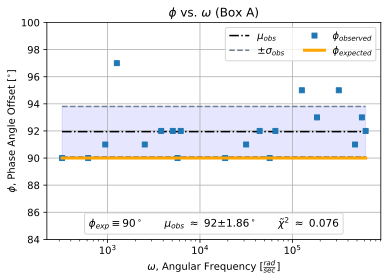

In [10]:
m   = np.mean(phase_angle)
std = np.std(phase_angle)

mm = np.full(len(phase_angle),m)
ss = np.full(len(phase_angle),std)

plt.fill_between(angular_frequency, mm-ss, mm+ss,
                 facecolor ="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.1)          # Transparency of the fill

l1, = plt.plot(angular_frequency,mm,'-.k',color='k',label='$\\mu_{obs}$')
l2, = plt.plot(angular_frequency,mm+ss,'--k',color='slategray', label='$\pm \sigma_{obs}$')
plt.plot(angular_frequency,mm-ss,'--k',color='slategray')


l3, = plt.plot(angular_frequency,phase_angle,'s',label='$\\phi_{observed}$',markersize=5)
l4, = plt.plot(angular_frequency,expected,'k',label='$\\phi_{expected}$',linewidth=3,color='orange')
plt.ylim(84,100)
plt.xlabel('$\\omega$, Angular Frequency $[\\frac{rad}{sec}]$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xscale('log')
plt.ylabel('$\\phi$, Phase Angle Offset [$^{\circ}$]')
plt.title('$\\phi$ vs. $\\omega$ (Box A)')



l5, = plt.plot(0,0,'none',label='$\\phi_{exp} \equiv 90^\\circ$')

custom_string = '$\\mu_{obs}$ $\\approx$ ' + str(format(m, ".3g")) + '$\\pm$' + str(format(std, ".3g")) + '$^\\circ$'
l6, = plt.plot(0,0,'none',label=custom_string)

csrf  = format(csr, ".2g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)
l7, = plt.plot(0,0,'none',label=csrf_string)


plt.grid()

legend1 = plt.legend(handles=[l1,l2,l3,l4],loc='upper right',ncol=2)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l5,l6,l7],loc='lower center',fontsize=10.5,ncol=3)

plt.savefig('boxA_phase',dpi=300,bbox_inches='tight')

Given the data, we can tentatively assume that box A contains a single component, with a constant phase angle of roughly pi/2.

In [11]:
"""boxDdata.png"""
load_resistance = np.asarray([3e4,3e4,3e4,1e4,1e4,5e3,5e3,3e3,3e3,1e3,1e3,1e3,4e2,3e2,3e2,1e2,1e2,1e2,4e1,4e1])         #*u.ohm

frequency       = np.asarray([5.15e1,7.27e1,9.22e1,1.922e2,2.503e2,4.095e2,5.321e2,6.542e2,8.623e2,9.6e2,1.1768e3,2.0851e3,
                       3.0718e3,7.6108e3,9.6099e3,2.75701e4,5.14583e4,7.58441e4,9.03068e4,1.00265e5])                   #*u.hertz

voltage_1       = np.asarray([10.,9.4,8.4,9.6,8.8,9.4,8.6,9.4,8.6,10.6,10.4,9.4,10.4,8.8,8.,
                              7.68,6.48,6.08,8.16,8.16])                                                                #*u.volt

voltage_2       = np.asarray([54.4,68.8,78.4,64.,76.,68.,78.,66.,76.,37.6,44.8,65.6,
                              44.8,68.,74.,52.8,56.,56.,32.8,32.8])                                                     #*u.volt

phase_angle     = np.asarray([96.5,98.4,99.3,96.7,94.5,93.8,94.2,91.4,95.6,91.4,99.7,
                              99.2,100,107,111,135,152,160,158,160])                                                    #*u.degree

In [12]:
impedance = (voltage_1/voltage_2)*load_resistance

In [13]:
angular_frequency = (2*np.pi*frequency)

In [14]:
resistance  = 9.826330840546422
capacitance = 5.550307730307296e-07

expected_phase = np.arctan(-1/(angular_frequency*capacitance*resistance))
expected       = expected_phase*(180/np.pi)+180

Offset, because the oscilloscope is plotting it's oscillating voltage as a function of time, and has to decide based on modulation. It may sometimes pick reference peaks which offset the values by 90 or 180 degrees. We attribute this to the measurement.
The fact that we are measuring Ch. 2 from the bottom?|

Small resistance or negative resistance is highly suggestive of zero resistance or stray resistance

In [15]:
csr = chi_square_reduced(expected,phase_angle)

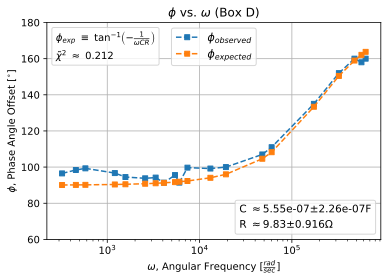

In [16]:
l1,  = plt.plot(angular_frequency,phase_angle,'s--',label='$\\phi_{observed}$',markersize=5)
l2,  = plt.plot(angular_frequency,expected,'s--',label='$\\phi_{expected}$',markersize=5)

plt.xlabel('$\\omega$, Angular Frequency $[\\frac{rad}{sec}]$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('$\\phi$, Phase Angle Offset [$^{\circ}$]')
plt.ylim(60,180)
plt.title('$\\phi$ vs. $\\omega$ (Box D)')

l3, = plt.plot(0,0,'none',label='$\\phi_{exp}$ $\\equiv$ $\\tan^{-1}{\\left(-\\frac{1}{\omega C R}\\right)}$')
csrf  = format(csr, ".3g")
csrf_string     = '$\\tilde{\\chi}^2$ $\\approx$ ' + str(csrf)
l4, = plt.plot(0,0,'none',label=csrf_string)

plt.grid()
plt.xscale('log')

capacitance = 'C $\\approx$' + str(format(5.550307730307296e-07,".3g")) + '$\\pm$2.26e-07F'
resistance  = 'R $\\approx$' + str(format(9.826330840546422,".3g")) + '$\\pm$0.916$\\Omega$'

l5, = plt.plot(0,0,'none',label=capacitance)
l6, = plt.plot(0,0,'none',label=resistance)


legend1 = plt.legend(handles=[l1,l2],loc='upper center',ncol=1,fontsize=11.25)
ax = plt.gca().add_artist(legend1)
legend2 = plt.legend(handletextpad=0,handlelength=0,handles=[l3,l4],loc='upper left')
ax = plt.gca().add_artist(legend2)
plt.legend(handletextpad=0,handlelength=0,handles=[l5,l6],loc='lower right',fontsize=10.5)

plt.savefig('boxD_phase',dpi=300,bbox_inches='tight')

In [17]:
"""boxEdata.png"""
load_resistance = np.asarray([2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,
                              1e4,1e4,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2])   #*u.ohm

CH1_voltage     = np.asarray([36,36,33.2,20.8,25,21.6,20.4,9.2,6,4.4,18,17.6,13.6,11.2,9.6,7.6,6.4,6.8,6.4,
                              5.6,7.2,4.8,13.2,7.8,20,27.2,33,34.4,37.6,38.8,38.85,40])                         #*u.volt

CH1_frequency   = np.asarray([5.1e1,9.6e1,2.94e2,5.09e2,7.09e2,9.08e2,1.01e3,2.96e3,5.08e3,7.1e3,9.01e3,
                             9.5e3,1.266e4,1.53e4,1.71e4,1.99e4,2.222e4,2.421e4,2.65e4,2.85e4,3.195e4,3.509e4,
                             3.69e4,4.2e4,4.2e4,4.55e4,4.85e4,4.94e4,5.3e4,5.59e4,5.83e4,6.03e4])               #*u.hertz

CH2_voltage     = np.asarray([8,10.8,20.8,28.4,32.4,35.2,36.4,39.6,39.6,39.2,36.8,37.2,38.4,39,39.2,39.6,40,
                             40.8,40.8,41.4,44,43,42,42,39,35,31,29,24,22,19,18])                               #*u.volt

CH2_frequency   = np.asarray([5.1e1,9.5e1,2.97e2,5.1e2,7.08e2,9.06e2,1.012e3,2.95e3,5.063e3,7.042e3,9.015e3,
                             9.5e3,1.27e4,1.54e4,1.71e4,2e4,2.241e4,2.45e4,2.67e4,2.916e4,3.226e4,3.52e4,
                             3.72e4,4.003e4,4.3e4,4.545e4,4.9e4,4.97e4,5.2e4,5.57e4,5.8e4,6.01e4])              #*u.hertz

phase_angle     = np.asarray([145,130,110,108,103,101,105,107,120,138,100,102,104,102,103,106,106,110,110,111,
                              107,125,110,120,102,98,95,100,98,98,94,97])                                       #*u.degree

In [18]:
impedance = (CH1_voltage/CH2_voltage)*load_resistance

In [19]:
total = len(CH1_frequency)
average_frequency = np.zeros(total) #*u.hertz
for index in range(total):
    average_frequency[index] = np.asarray((CH1_frequency[index]+CH2_frequency[index])/2) #*u.hertz

In [20]:
angular_frequency = (2*np.pi*average_frequency)

In [21]:
w = angular_frequency
L = 0.007953850229880509
C = 1.6964982445644692e-09
R = 2600

exp_phi1 = np.arctan((w*L-(1/w*C))/R)
exp_phi2 = np.arctan((w*(L*(1-w**2*L*C)-C*R**2))/R)
exp_phi3 = np.full(len(phase_angle),90)


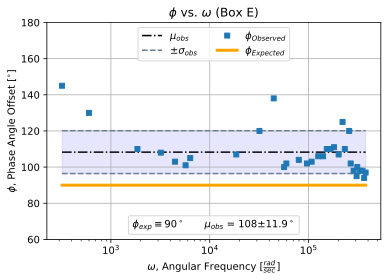

In [22]:
m   = np.mean(phase_angle)
std = np.std(phase_angle)

mm = np.full(len(phase_angle),m)
ss = np.full(len(phase_angle),std)

plt.fill_between(angular_frequency, mm-ss, mm+ss,
                 facecolor ="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.1)          # Transparency of the fill

l1, = plt.plot(angular_frequency,mm,'-.k',color='k',label='$\\mu_{obs}$')
l2, = plt.plot(angular_frequency,mm+ss,'--k',color='slategray', label='$\pm \sigma_{obs}$')
plt.plot(angular_frequency,mm-ss,'--k',color='slategray')

l3, = plt.plot(angular_frequency,phase_angle,'s',label='$\\phi_{Observed}$',markersize=5)
# plt.plot(angular_frequency,exp_phi1*(180/np.pi)+150,'o--',label='experimental data')
# plt.plot(angular_frequency,exp_phi2*(180/np.pi)+90,'o--',label='experimental data')
l4, = plt.plot(angular_frequency,exp_phi3,'k',label='$\\phi_{Expected}$',linewidth=3,color='orange')

plt.ylim(60,180)
plt.xlabel('$\\omega$, Angular Frequency $[\\frac{rad}{sec}]$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('$\\phi$, Phase Angle Offset [$^{\circ}$]')
plt.title('$\\phi$ vs. $\\omega$ (Box E)')

plt.grid()
plt.xscale('log')

l5, = plt.plot(0,0,'none',label='$\\phi_{exp} \equiv 90^\\circ$')

custom_string = '$\\mu_{obs}$ = ' + str(format(m, ".3g")) + '$\\pm$' + str(format(std, ".3g")) + '$^\\circ$'
l6, = plt.plot(0,0,'none',label=custom_string)

legend1 = plt.legend(handles=[l1,l2,l3,l4],loc='upper center',ncol=2)
ax = plt.gca().add_artist(legend1)
plt.legend(handletextpad=0,handlelength=0,handles=[l5,l6],loc='lower center',ncol=2)

plt.savefig('boxE_phase',dpi=300,bbox_inches='tight')